In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("RespiratoryDiseaseDeath.csv")

print(df.columns)
print(df.head())

Index(['REF_DATE', 'GEO', 'Age group', 'Sex', 'Cause of death (ICD-10)', 'UOM',
       'VECTOR', 'COORDINATE', 'VALUE'],
      dtype='object')
   REF_DATE     GEO        Age group         Sex  \
0      2000  Canada  Total, all ages  Both sexes   
1      2000  Canada  Total, all ages  Both sexes   
2      2000  Canada  Total, all ages  Both sexes   
3      2000  Canada  Total, all ages  Both sexes   
4      2000  Canada  Total, all ages  Both sexes   

                         Cause of death (ICD-10)     UOM     VECTOR  \
0                     Total, all causes of death  Number  v21019359   
1  Chapter X: Diseases of the respiratory system  Number  v21019360   
2             Acute upper respiratory infections  Number  v21019361   
3                              Acute pharyngitis  Number  v21019362   
4                      Streptococcal pharyngitis  Number  v21019363   

   COORDINATE   VALUE  
0     1.1.1.1  218062  
1  1.1.1.3891   17745  
2  1.1.1.3892      24  
3  1.1.1.3902       1

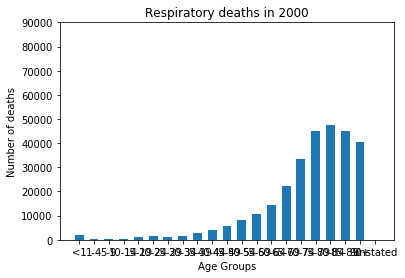

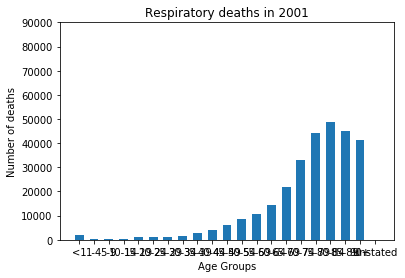

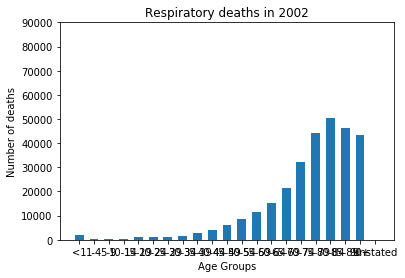

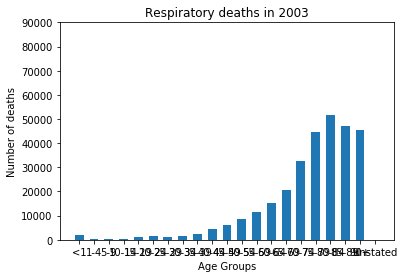

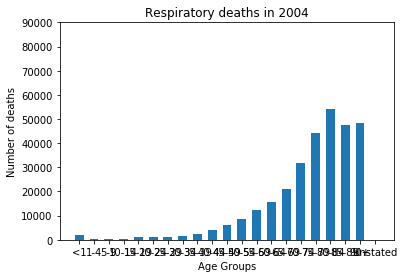

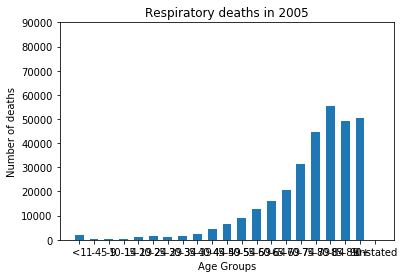

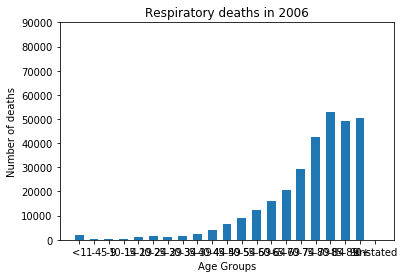

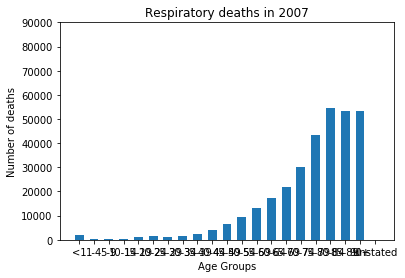

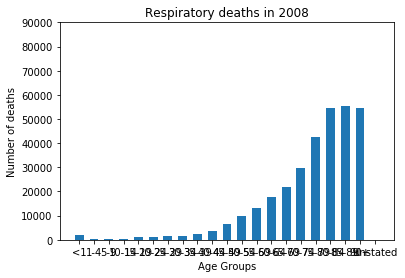

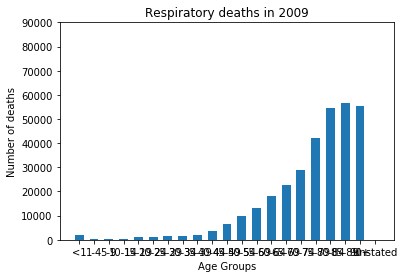

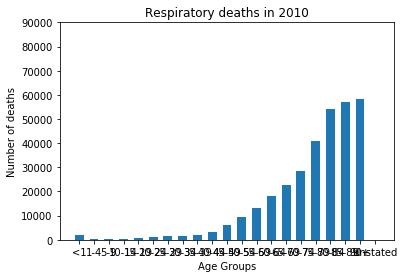

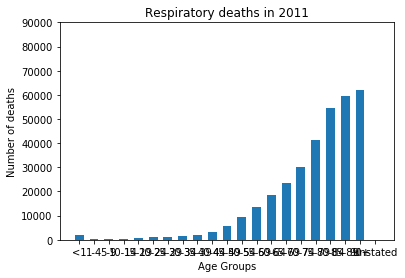

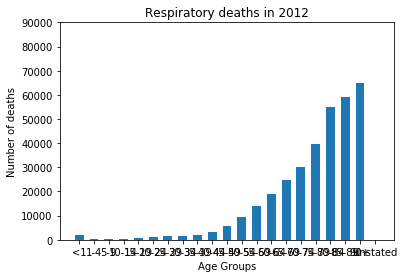

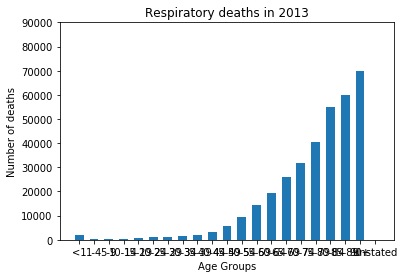

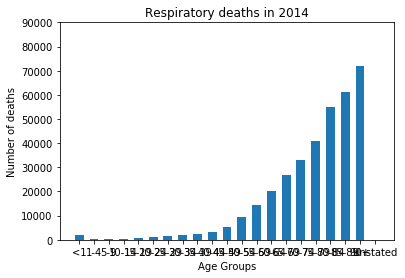

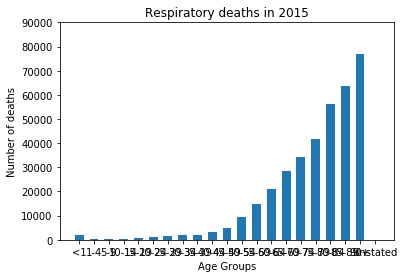

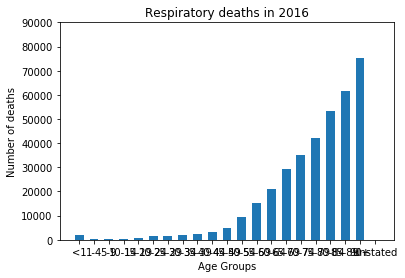

In [2]:
for year in df["REF_DATE"].unique():
    age_groups = df.loc[(df["Sex"]=="Both sexes") & (df["REF_DATE"]==year)].groupby(["Age group"], sort=False).sum()["VALUE"]
    ticks = range(1, len(age_groups[1:]) + 1)
    height = age_groups[1:]
    tick_label = ["<1","1-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59",
                  "60-64","65-69","70-74","75-79","80-84","85-89","90+","Unstated"]
    #tick_label = range(1, len(age_groups[1:]) + 1)
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title("Respiratory deaths in " + str(year))
    plt.ylabel("Number of deaths")
    plt.xlabel("Age Groups")
    plt.ylim([0, 90000])
    plt.show()

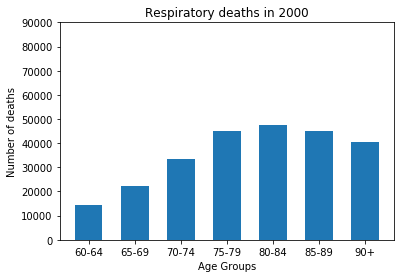

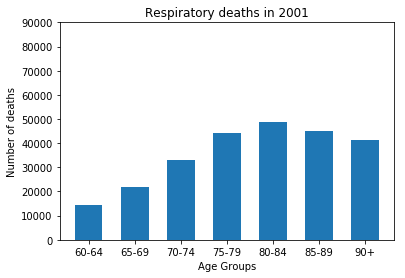

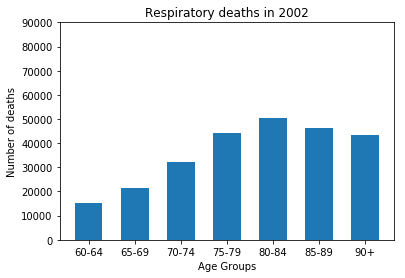

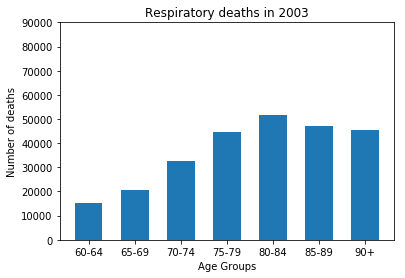

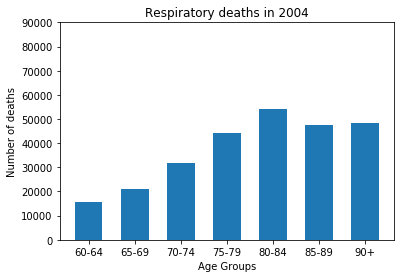

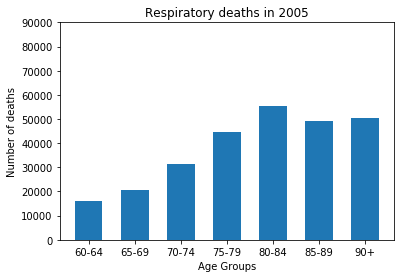

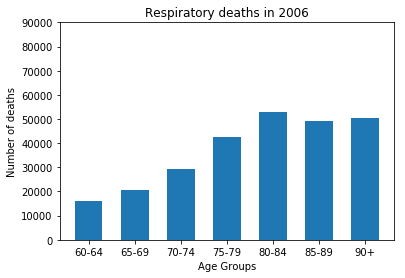

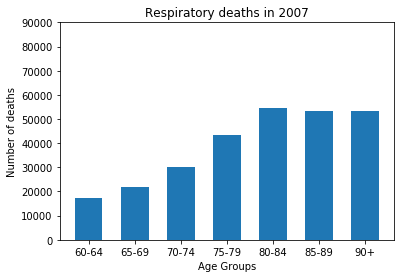

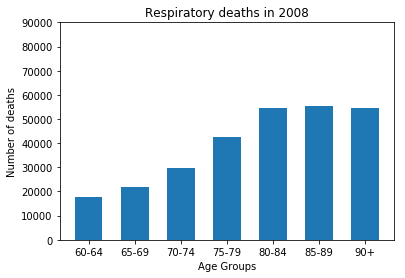

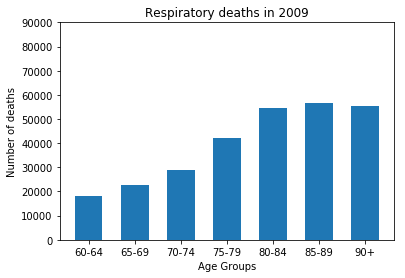

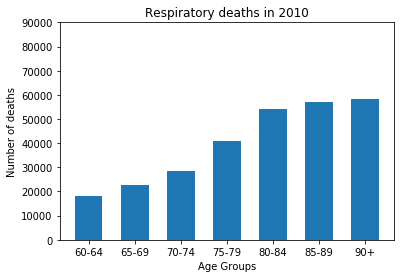

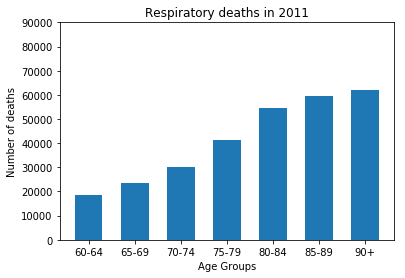

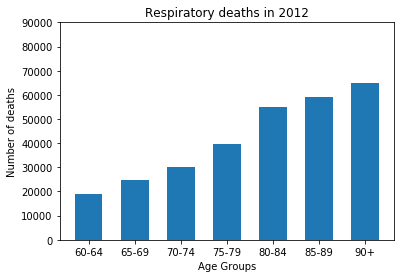

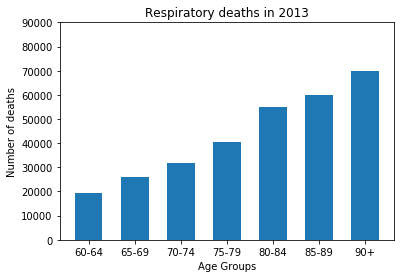

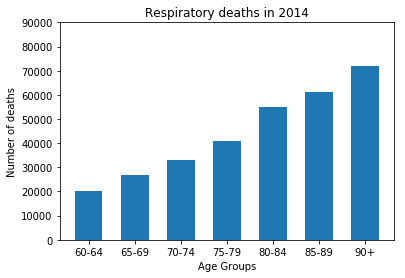

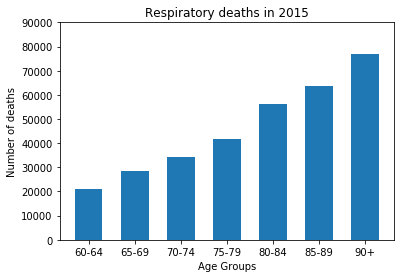

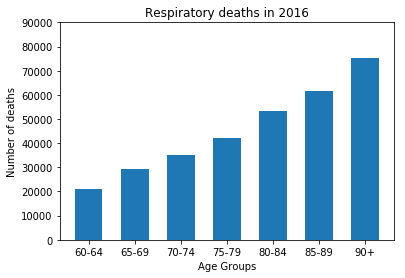

In [3]:
for year in df["REF_DATE"].unique():
    age_groups = df.loc[(df["Sex"]=="Both sexes") & (df["REF_DATE"]==year)].groupby(["Age group"], sort=False).sum()["VALUE"]
    ticks = range(1, len(age_groups[14:-1]) + 1)
    height = age_groups[14:-1]
    tick_label = ["60-64","65-69","70-74","75-79","80-84","85-89","90+"]
    #tick_label = range(1, len(age_groups[1:]) + 1)
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title("Respiratory deaths in " + str(year))
    plt.ylabel("Number of deaths")
    plt.xlabel("Age Groups")
    plt.ylim([0, 90000])
    plt.show()

In [4]:
# look at the top 10 deadliest respiratory diseases for each year
for year in df["REF_DATE"].unique():
    print("\nYear "+ str(year))
    print(df.loc[(df["Sex"]=="Both sexes") & (df["REF_DATE"]==year) & (df["Age group"]=="Total, all ages")].
          groupby(["Cause of death (ICD-10)"]).sum().sort_values("VALUE", ascending=False)["VALUE"][1:11])
#male_age_group_2000 = df.loc[(df["REF_DATE"]==2000)&(df["Sex"]=="Males")]["Age group"].unique()
#top 10 is consistent through the years


Year 2000
Cause of death (ICD-10)
Chapter X: Diseases of the respiratory system                        17745
Chronic lower respiratory diseases                                    9813
Other chronic obstructive pulmonary disease                           8346
Chronic obstructive pulmonary disease, unspecified                    7742
Influenza and pneumonia                                               4966
Pneumonia, organism unspecified                                       4272
Pneumonia, unspecified                                                3628
Other respiratory diseases principally affecting the interstitium     1287
Other interstitial pulmonary diseases                                 1088
Other interstitial pulmonary diseases with fibrosis                    938
Name: VALUE, dtype: int64

Year 2001
Cause of death (ICD-10)
Chapter X: Diseases of the respiratory system                        17585
Chronic lower respiratory diseases                                    9773
Othe

Cause of death (ICD-10)
Chapter X: Diseases of the respiratory system                                   23727
Chronic lower respiratory diseases                                              12293
Other chronic obstructive pulmonary disease                                     11197
Chronic obstructive pulmonary disease, unspecified                               6520
Influenza and pneumonia                                                          6235
Pneumonia, organism unspecified                                                  5384
Pneumonia, unspecified                                                           4977
Chronic obstructive pulmonary disease with acute lower respiratory infection     3475
Other respiratory diseases principally affecting the interstitium                2667
Other interstitial pulmonary diseases                                            2512
Name: VALUE, dtype: int64


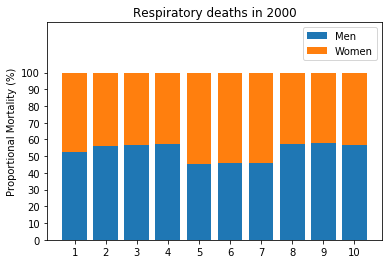

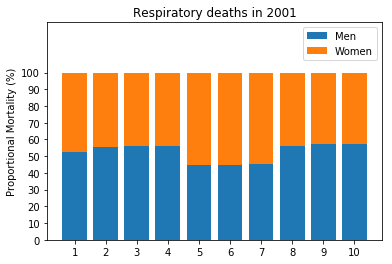

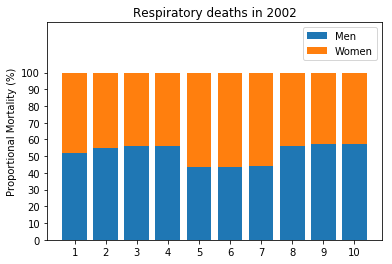

ValueError: shape mismatch: objects cannot be broadcast to a single shape

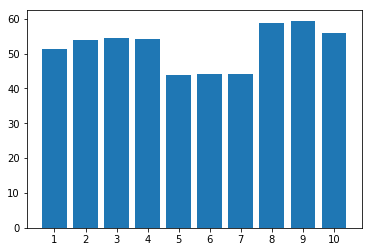

In [5]:
# Look if there is a gender bias in top 10 deadliest respiratory diseases (total) for each year
for year in df["REF_DATE"].unique():
    total = df.loc[(df["Sex"]=="Both sexes")&(df["REF_DATE"]==year)&(df["Age group"]=="Total, all ages")].\
        groupby(["Cause of death (ICD-10)"]).sum().sort_values("VALUE", ascending=False)["VALUE"][1:11]

    male = df.loc[(df["Sex"]=="Males")&(df["REF_DATE"]==year)&(df["Age group"]=="Total, all ages")].\
        groupby(["Cause of death (ICD-10)"]).sum().sort_values("VALUE", ascending=False)["VALUE"][1:11]

    female = df.loc[(df["Sex"]=="Females")&(df["REF_DATE"]==year)&(df["Age group"]=="Total, all ages")].\
        groupby(["Cause of death (ICD-10)"]).sum().sort_values("VALUE", ascending=False)["VALUE"][1:11]

    mens = (100*(male/total)).values
    womens = (100*(female/total)).values

    #top 10 killers for males vs females is not the same for every year
    ticks = range(1,len(total)+1)
    p1 = plt.bar(ticks, mens, tick_label=ticks)
    p2 = plt.bar(ticks, womens, bottom=mens)

    #plt.xticks = (ticks, (df["REF_DATE"].unique()))
    plt.legend((p1[0], p2[0]), ("Men", "Women"))
    plt.title("Respiratory deaths in " + str(year))
    plt.yticks(range(0,110, 10))
    plt.ylim(0,130)
    plt.ylabel("Proportional Mortality (%)")
    plt.show()

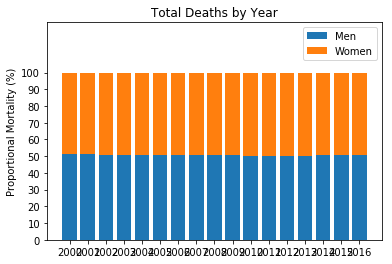

In [6]:
# look at total deaths per year and separate by gender
total = df.loc[(df["Sex"]=="Both sexes")&(df["Age group"]=="Total, all ages")
               &(df["Cause of death (ICD-10)"]=="Total, all causes of death")][["REF_DATE", "VALUE"]]

male = df.loc[(df["Sex"]=="Males")&(df["Age group"]=="Total, all ages")
              & (df["Cause of death (ICD-10)"]=="Total, all causes of death")][["REF_DATE","VALUE"]]

female = df.loc[(df["Sex"]=="Females")&(df["Age group"]=="Total, all ages")
                & (df["Cause of death (ICD-10)"]=="Total, all causes of death")][["REF_DATE","VALUE"]]

mens = (100*(male["VALUE"].values/total["VALUE"].values))
womens = (100*(female["VALUE"].values/total["VALUE"].values))
ticks = total["REF_DATE"]
p1 = plt.bar(ticks, mens, tick_label=ticks)
p2 = plt.bar(ticks, womens, bottom=mens)

#plt.xticks = (ticks, (df["REF_DATE"].unique()))
plt.legend((p1[0], p2[0]), ("Men", "Women"))
plt.title("Total Deaths by Year")
plt.yticks(range(0, 110, 10))
plt.ylim(0, 130)
plt.ylabel("Proportional Mortality (%)")
plt.show()
